# Welcome!

This notebook is prepared to show the important fundamentals and techniques of ML, specifically in classification tasks.

Let's start!

## 1. Understand the problem
- What is the problem? Clear definition of problem with a few sentences.
- What are the metrics? The most important one?
- Is there a traditional way of solving the problem? If yes, check it.
- Consult to domain experts! What can be the potential challenges? 
- Search similar problems, projects? Check their solutions?

## 2. Explore the data
- Read the description of the dataset
- Check features and notes of the dataset creators -> Understanding the features will be helpful in EDA, removing outliers, feature engineering parts etc.
- If you collect the data, you will create the description

### Import necessary packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [80]:
df = pd.read_csv('heart.csv')

### First check

In [81]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### First observations:
- They are all numerical, but not scaled.
- 13 features, 1 target column. Not too many features.
- Outputs are all 1 for the first 10 samples. Probably, they are ordered. Be careful, shuffling is necessary.
- It seems that we don't have missing values. However, we cannot be sure with only 10 samples. We should check it!

### More information

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Important points:
- 303 samples, not too much data
- Data types are numerical for all. Good, we don't need to convert.
- 303 non-null for all. Same with total sample size. -> We don't have missing values.

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Important statistical info:
- Check min, max and mean values of the features.
-- If mean is close to the min or max too much, then we can expect some outliers in the opposite site. For example, "chol" min -> 126.0 | max -> 564.0 | mean -> 246.26.. If you check 25%, 50% and 75% values of the "chol", you can expect sth like 300.0. However, we have 564.0! We should check and pay attention to biggest values. Of course, from this information, it is hard to be sure. Therefore, we need to use some data visualization techniques. 
- Check mean and std values of the features. 
-- If std is bigger than mean, again we can expect outliers for that feature.
- Min and max values show that features are not scaled.
- We have some continous and discrete features. "chol" is continous. "exng" is discrete and it can take only 0 or 1. So, categorical.


### Check missing values

In [88]:
df.isnull()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### We don't have any missing values. 
When we have, you can remove the rows with missing values if you have sufficient data. However, in this case, we have only 303 samples. Therefore, you can consider filling the missing values. There are different techniques. Check all! Simply, you can fill with mean values considering the important groups. For example, if some height and weight features are missing, then you should consider the gender feature while using the mean value. For this dataset, we don't need!

### Class Distribution

In [91]:
# target column is "output"
df['output'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

#### %55-45 is a balanced distribution. It doesn't have to be 50-50. Sometimes, you can see %2-98. Obviously, it is imbalanced. However, if you see %30-70. Before saying imbalanced, we should see the model's performance. If there is no bias for the dominant class, that distribution can be considered as "balanced" for us.

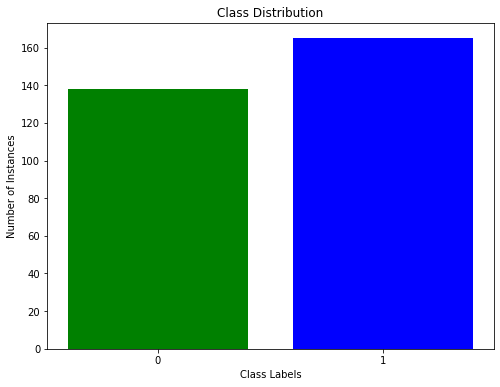

In [92]:
unique_classes = df['output'].unique()
class_counts = df['output'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=['blue', 'green'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(unique_classes)
plt.show()

### Visualize - explore more: outliers?

In [93]:
target_column = 'output'

# all features
features = np.array(df.columns.difference([target_column]))

# categorical features
categorical_features = ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall', 'fbs', 'exng']

# others
non_cat_features = [feature for feature in features if feature not in categorical_features]

print("All features -> ", features)
print("Non-categorical features -> ", non_cat_features)
print("Categorical features -> ", categorical_features)
print(f"All -> {len(features)} | Categorical -> {len(categorical_features)} | Others -> {len(non_cat_features)}")

All features ->  ['age' 'caa' 'chol' 'cp' 'exng' 'fbs' 'oldpeak' 'restecg' 'sex' 'slp'
 'thalachh' 'thall' 'trtbps']
Non-categorical features ->  ['age', 'chol', 'oldpeak', 'thalachh', 'trtbps']
Categorical features ->  ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall', 'fbs', 'exng']
All -> 13 | Categorical -> 8 | Others -> 5


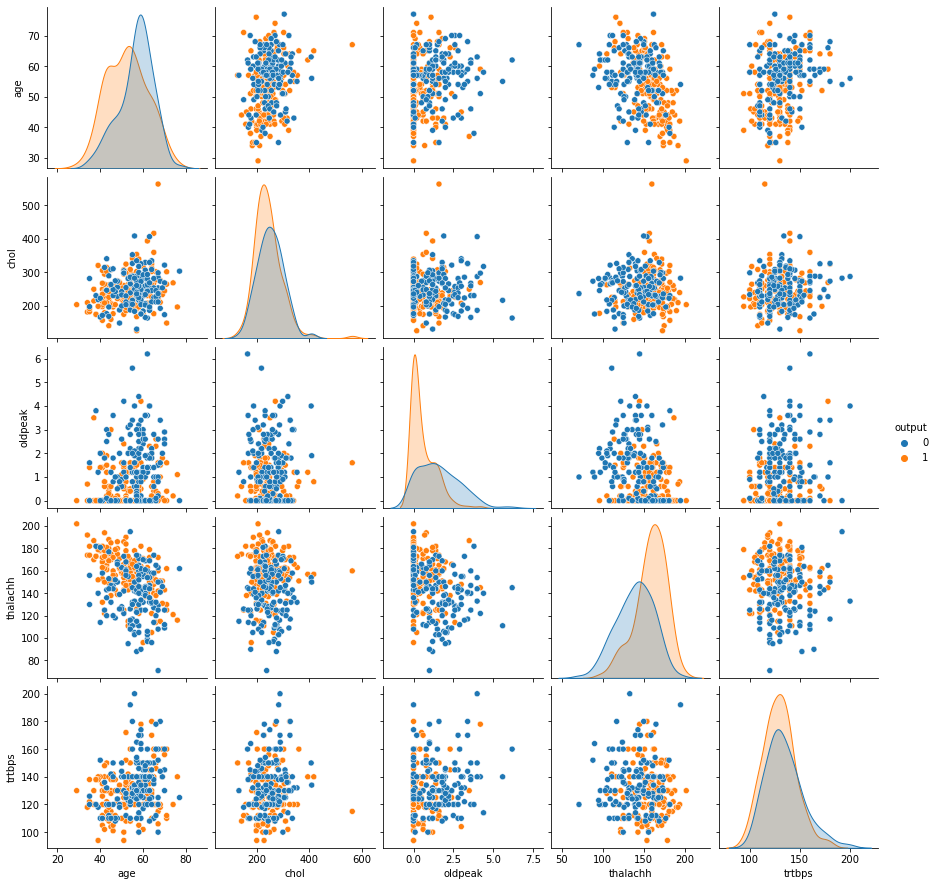

In [94]:
# Create scatter plots using pairplot
target = df['output']
# Combine the selected features and target into a single DataFrame
df_selected = pd.concat([df[non_cat_features], target], axis=1)

sns.pairplot(df_selected, hue='output', diag_kind='kde')
plt.show()

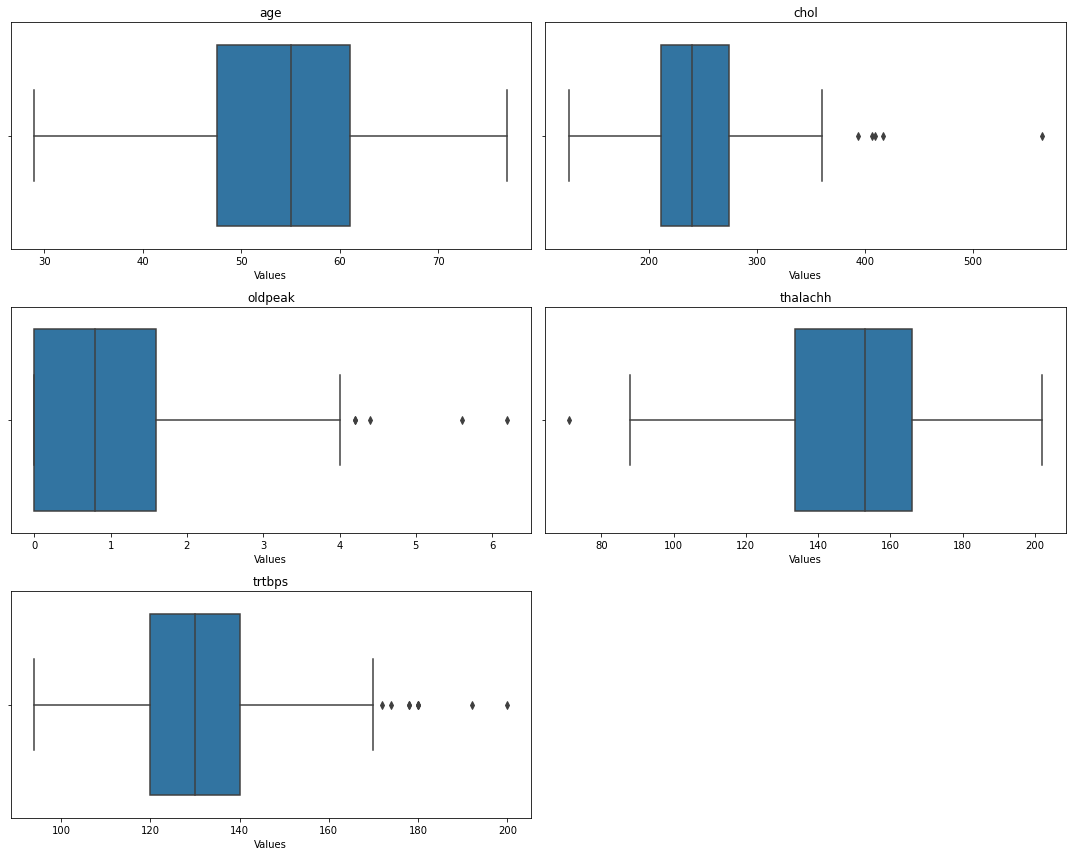

In [95]:
# we have 5 non_categorical features
num_rows = 3
num_cols = 2

plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(non_cat_features):  # If using a DataFrame
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [96]:
# thresholds for the potential outliers?
chol_threshold = 400  # outliers > 400
oldpeak_threshold = 4  # outliers > 4
thalachh_threshold = 80 # outliers < 80
trtbps_threshold = 180  # outliers > 180

In [97]:
print(len(df[df['chol']>400]))
print(len(df[df['oldpeak']>4]))
print(len(df[df['thalachh']<80]))
print(len(df[df['trtbps']>180]))

4
5
1
2


### Let's check one by one

In [98]:
df[df['chol']>400]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [99]:
df[df['oldpeak']>4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [100]:
df[df['thalachh']<80]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [101]:
df[df['trtbps']>180]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


#### Important:
Most of the potential outliers belong to class "0". 0 -> 9 | 1 -> 3 Removing all can affect the model's performance on specific classes.

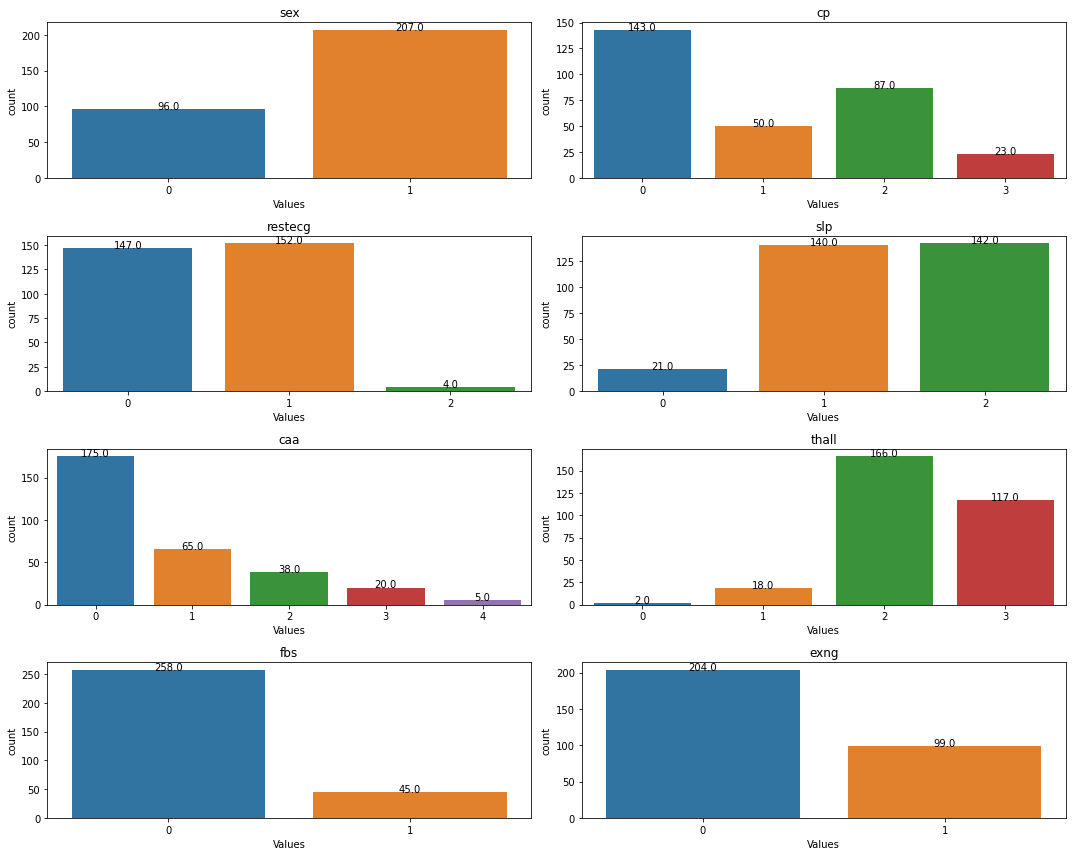

In [102]:
# we have 8 features
num_rows = 4
num_cols = 2

plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(categorical_features):  # If using a DataFrame
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(x=df[feature])
    plt.title(feature)
    plt.xlabel('Values')
    
    # Add exact values to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [103]:
# potential outliers
# restecg -> 2
# thall -> 0
print(len(df[df['restecg']==2]))
print(len(df[df['thall']==0]))

4
2


In [104]:
df[df['restecg']==2]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [105]:
df[df['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


#### 18 outliers
As you see, I check the features and set a threshold based on the plots. However, at this step, domain knowledge is also critical. If you have knowledge or access to experts, you can consult them. For example, 0 for the "thall" feature can be impossible and it may be a typo. Or maybe it is critical and you data is not representative enough. For this notebook, we didn't use the domain knowledge and didn't check each of the potential outliers deeply.
4 + 5 + 1 + 2 + 4 + 2 => Totally 18 outliers. This value is also important. Since we have only 303 samples, 50 will be too much. 18 is nearly %6 of our dataset. Therefore, it may be acceptable. However, be careful, as you see most of the potential outliers belong to class 0. 5->Class 1 | 13->Class 0 More analysis is needed.

## 3. Preprocessing and preparing the data for the models

We will have two data. One with outliers and without.

### Create X and y with outliers

In [106]:
X = df.drop(columns=['output'])
y = df['output']

In [107]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [108]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

### Split data into train and test

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [112]:
print("X_train -> ", X_train.shape)
print("X_test -> ", X_test.shape)
print("Y_train -> ", y_train.shape)
print("X_train -> ", y_test.shape)

X_train ->  (242, 13)
X_test ->  (61, 13)
Y_train ->  (242,)
X_train ->  (61,)


### Scale the features

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
X_train

array([[0.83333333, 0.        , 1.        , ..., 1.        , 0.5       ,
        0.66666667],
       [0.77083333, 1.        , 0.33333333, ..., 0.5       , 0.75      ,
        0.33333333],
       [0.54166667, 0.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       ...,
       [0.45833333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.54166667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.72916667, 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667]])

In [116]:
X_test

array([[0.58333333, 1.        , 0.        , 0.52830189, 0.34246575,
        0.        , 0.        , 0.3129771 , 1.        , 0.09677419,
        0.5       , 0.25      , 0.33333333],
       [0.79166667, 1.        , 0.        , 0.29245283, 0.29223744,
        1.        , 0.5       , 0.70229008, 0.        , 0.03225806,
        0.5       , 0.5       , 1.        ],
       [0.35416667, 1.        , 0.        , 0.43396226, 0.42237443,
        0.        , 0.5       , 0.3740458 , 1.        , 0.29032258,
        0.5       , 0.5       , 1.        ],
       [0.64583333, 1.        , 0.66666667, 0.43396226, 0.1347032 ,
        0.        , 0.        , 0.64122137, 0.        , 0.48387097,
        0.5       , 0.        , 0.66666667],
       [0.4375    , 1.        , 0.66666667, 0.43396226, 0.24429224,
        0.        , 0.5       , 0.70229008, 0.        , 0.09677419,
        0.5       , 0.25      , 1.        ],
       [0.85416667, 1.        , 0.66666667, 0.62264151, 0.32648402,
        0.        , 0.5    

## 4. Build ML Models and Training

In [117]:
from sklearn.neural_network import MLPClassifier

In [118]:
model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)

### Make predictions to obtain predicted_values

In [119]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [120]:
y_pred = model.predict(X_test)

In [121]:
confusion_matrix(y_test, y_pred)

array([[16, 12],
       [ 0, 33]])

In [122]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [123]:
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8033
Recall: 1.0
Precision: 0.7333


### Let's look at the results without outliers

In [124]:
df_2 = df.copy()

In [125]:
df_2 = df_2[df_2['chol']<400]
df_2 = df_2[df_2['oldpeak']<4]
df_2 = df_2[df_2['thalachh']>80]
# df_2 = df_2[df_2['trtbps']<180]
# df_2 = df_2[df_2['restecg']!=2]
# df_2 = df_2[df_2['thall']!=0]

In [126]:
df_2['output'].value_counts(normalize=True)

1    0.556701
0    0.443299
Name: output, dtype: float64

In [127]:
df_2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [128]:
X_2 = df_2.drop(columns=['output'])
y_2 = df_2['output']

In [129]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_2, stratify=y_2, test_size=0.2, random_state=42)

In [130]:
scaler_2 = MinMaxScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [131]:
model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)
model.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)

In [132]:
y_pred_2 = model.predict(X_test_2)
confusion_matrix(y_test_2, y_pred_2)

array([[23,  3],
       [ 9, 24]])

In [133]:
accuracy = accuracy_score(y_test_2, y_pred_2)
recall = recall_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7966
Recall: 0.7273
Precision: 0.8889


### Build a SVM and compare the results

In [134]:
from sklearn.svm import SVC

In [135]:
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [136]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[18, 10],
       [ 2, 31]])

In [137]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8033
Recall: 0.9394
Precision: 0.7561


### SVM without outliers

In [138]:
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train_2, y_train_2)

SVC(random_state=42)

In [139]:
y_pred_2 = model.predict(X_test_2)
confusion_matrix(y_test_2, y_pred_2)

array([[21,  5],
       [ 8, 25]])

In [140]:
accuracy = accuracy_score(y_test_2, y_pred_2)
recall = recall_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7797
Recall: 0.7576
Precision: 0.8333


### XGBoost

In [ ]:
# !pip install xgboost

In [141]:
import xgboost as xgb

In [142]:
model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size for each iteration
    random_state=42
)

In [143]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [144]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18, 10],
       [ 1, 32]])

In [145]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8197
Recall: 0.9697
Precision: 0.7619


### Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [148]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18, 10],
       [ 1, 32]])

In [149]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8197
Recall: 0.9697
Precision: 0.7619


## 5. Choose a ML model and build final model

Which metric is more important?
In our problem, False Negative's cost is more than False Positive's cost. In other words, if you say "it is ok" to a person who can have heart attack soon, it will be vital mistake. On the other hand, if you say "you should be careful, you can have heart attack to a haelthy person", it is again False, but False Positive and just False alarm. Cost is less than the previous one. Therefore, we want to maximize the recall. Of course, we should consider other metrics, not only one metric.

Random Forest is best for our problem. Then we will choose it.


### Build a pipeline

In [150]:
from sklearn.pipeline import Pipeline

In [151]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),       # Step 1: StandardScaler
    ('model', RandomForestClassifier(n_estimators=100, random_state=42)) # Step 2: RandomForestClassifier
])

In [152]:
positive_samples = df[df['output'] == 1].sample(n=2, random_state=42)
negative_samples = df[df['output'] == 0].sample(n=2, random_state=42)

In [153]:
samples_labeled = pd.concat([positive_samples, negative_samples], ignore_index=True)
samples_labeled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
1,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
3,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [154]:
samples = samples_labeled.drop(columns=['output'])
samples

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2
1,37,0,2,120,215,0,1,170,0,0.0,2,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [155]:
sample_indices = np.concatenate((np.array(positive_samples.index), np.array(negative_samples.index)))
sample_indices

array([135, 115, 254, 270])

In [156]:
df_3 = df.copy()

In [157]:
df_3 = df_3.drop(sample_indices)

In [158]:
X = df_3.drop(columns=['output'])
y = df_3['output']

In [159]:
pipeline.fit(X,y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [160]:
y_pred = pipeline.predict(samples)

In [161]:
y_pred

array([1, 1, 1, 0])

In [162]:
samples_labeled['predictions'] = y_pred

In [163]:
samples_labeled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predictions
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,1
1,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1,1
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1
3,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,0


## 6. Save your model

In [164]:
import joblib

joblib.dump(pipeline, 'heart_attack_detector.pkl')


['heart_attack_detector.pkl']

In [165]:
# to load 
loaded_model = joblib.load('heart_attack_detector.pkl')

In [166]:
# you can use it to make predictions
new_sample = {
    'age': [45], 
    'sex': [0], 
    'cp': [2], 
    'trtbps': [150], 
    'chol': [270], 
    'fbs': [0], 
    'restecg': [1], 
    'thalachh': [170], 
    'exng': [0], 
    'oldpeak': [0.8], 
    'slp': [2], 
    'caa': [0], 
    'thall': [2]
}
new_sample_df = pd.DataFrame(new_sample)

In [167]:
prediction = loaded_model.predict(new_sample_df)

In [168]:
print(prediction)

[1]
